In [54]:

# There are various ways to deal with missing data points.
# You can simply drop records if they contain any nulls.
# data.dropna()

# You can fill nulls with zeros
# data.fillna(0)

# You can also fill with mean, median, mode, or even do a forward-fill or back-fill.

# The problems with all of these options, is that if features are imputed scientifically, your model won't learn as well 
# as it could if you had more accurate data points, and you won't be able to do very reliable predictive analytics.

# A viable alternative is to impute missing values using some machine learning techniques 
# (regression or classification).

import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()


# Load data
df = pd.read_csv('C:\\Users\\titanic.csv')
print(df)
list(df)
df.dtypes


     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

<Axes: >

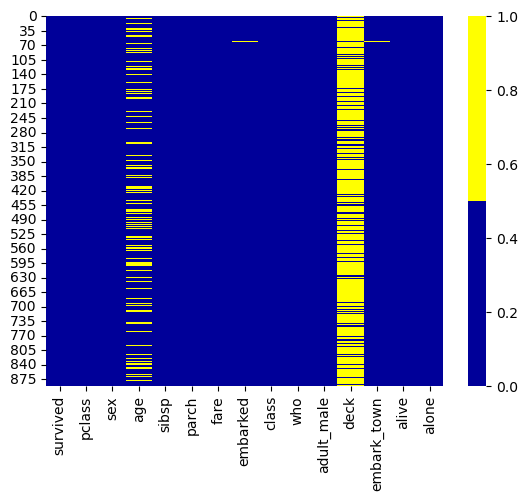

In [55]:

# visualize what's missing
colours = ['#000099', '#ffff00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))


In [56]:

# Find missing per feature
print(df.isnull().sum())

print('------------')

# Find any/all missing data points in entire data set
print(df.isnull().sum().sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
------------
869


In [57]:

# fill nulls with zeros, otherwise regression calculations won't run
df = df.fillna(0)
df.dtypes

# Now, we will use a simple regression technique to train and test our model

X = df[['survived', 'pclass', 'sibsp', 'parch', 'fare']]
Y = df['age']


# train and build a linear regression model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Linear Regression R^2": %.4f' % regressor.score(X_test, y_test))


Linear Regression R^2": 0.1304


In [61]:

# Now, we will use a simple regression technique to predict the missing values
data_with_null = df[['survived','pclass','sibsp','parch','fare','age']]

print(data_with_null.shape)

data_without_null = data_with_null.dropna()
train_data_x = data_without_null.iloc[:,:5]
train_data_y = data_without_null.iloc[:,5]

linreg.fit(train_data_x,train_data_y)

test_data = data_with_null.iloc[:,:5]
age = pd.DataFrame(linreg.predict(test_data))

# check for nulls
data_with_null.apply(lambda x: sum(x.isnull()),axis=0)

# Find missing per feature
print(data_with_null.isnull().sum())



# Find any/all missing data points in entire data set
print(data_with_null.isnull().sum().sum())


# View age feature
age = list(linreg.predict(test_data))
print(age)


# Finally, we will join our predicted values back into the 'data_with_null' dataframe
data_with_null.age = age


# Check for nulls
data_with_null.apply(lambda x: sum(x.isnull()),axis=0)


(891, 6)
survived    0
pclass      0
sibsp       0
parch       0
fare        0
age         0
dtype: int64
0
[18.241592990343126, 30.09754056358163, 16.247588730809618, 30.37761156899036, 20.906993351093003, 20.900704449105554, 37.735724780608635, 13.730331493904195, 18.31242261092509, 21.98054226002928, 14.491833097512384, 33.46427440673445, 20.906993351093003, 23.15716982966527, 20.910009189959382, 24.87499234812415, 10.928617680817986, 24.92120029806867, 18.07601450304193, 16.258370585796673, 29.382295799840154, 24.92120029806867, 16.245983774681545, 33.32642068939996, 13.730331493904195, 18.494107080011275, 20.919700537327746, 28.56473052998414, 16.24829417217877, 20.90936843972015, 38.10757093566717, 28.938683685598015, 16.250284194556382, 29.62103687455351, 34.59117416343905, 35.05588443550109, 16.25830589466675, 20.906993351093003, 15.398292022306844, 13.518780280880868, 18.207322094134273, 26.781586569012607, 20.90936843972015, 23.917532605033248, 16.24829417217877, 20.906993351

survived    0
pclass      0
sibsp       0
parch       0
fare        0
age         0
dtype: int64

In [60]:

# now we get 100% prediction accuracy!!

df = data_with_null
X = df[['survived', 'pclass', 'sibsp', 'parch', 'fare']]
Y = df['age']


# train and build a linear regression model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Linear Regression R^2": %.4f' % regressor.score(X_test, y_test))


Linear Regression R^2": 1.0000


     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

<Axes: >

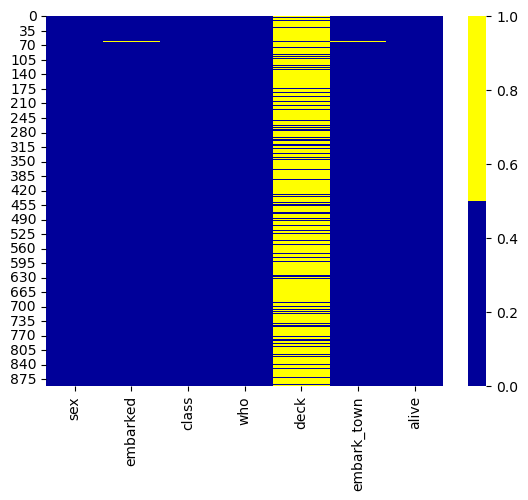

In [67]:

# That worked quite well. Now let's try to imput missing records that are objects, and thus non-numerics.
# Here we will focus on the 'object' data type.

df = pd.read_csv('C:\\Users\\titanic.csv')
print(df)
df = df[['sex','embarked','class','who','deck','embark_town','alive']]
df.dtypes

# visualize what's missing
colours = ['#000099', '#ffff00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))


In [71]:

# convert labels to categories; learning algos typically can't consume string-related data points 

df_cat = pd.DataFrame({col: df[col].astype('category').cat.codes for col in df}, index=df.index)
df_cat.head()


,sex,embarked,class,who,deck,embark_town,alive
0,1,2,2,1,-1,2,0
1,0,0,0,2,2,0,1
2,0,2,2,2,-1,2,1
3,0,2,0,2,2,2,1
4,1,2,2,1,-1,2,0


In [74]:

# the dependent variable will be 'deck' because it has the most missing records

X = df_cat[['sex','embarked','class','who','embark_town','alive']]
y = df_cat['deck']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

# ok, the accuracy of learning is a little over 70%. not great.


C:\Users\ryans\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.7262569832402235

In [75]:

# we can try a couple other classifier methodologies

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.7094972067039106

In [77]:

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.7262569832402235

In [89]:

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=8)
after_impute = imputer.fit_transform(df_cat)
after_impute = pd.DataFrame(after_impute)
after_impute.columns=['sex','embarked','class','who','embark_town','alive','deck']
after_impute.head()


,sex,embarked,class,who,embark_town,alive,deck
0,1.0,2.0,2.0,1.0,-1.0,2.0,0.0
1,0.0,0.0,0.0,2.0,2.0,0.0,1.0
2,0.0,2.0,2.0,2.0,-1.0,2.0,1.0
3,0.0,2.0,0.0,2.0,2.0,2.0,1.0
4,1.0,2.0,2.0,1.0,-1.0,2.0,0.0


In [90]:

X = after_impute[['sex','embarked','class','who','embark_town','alive']]
y = after_impute['deck']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


C:\Users\ryans\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.7877094972067039

In [91]:

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.7430167597765364

In [100]:

# Now, we will use a simple regression technique to predict the missing values
data_with_null = df[['sex','embarked','class','who','embark_town','alive','deck']]

# Find missing per feature
print(data_with_null.isnull().sum())

print('------------')

# Find any/all missing data points in entire data set
print(data_with_null.isnull().sum().sum())


sex              0
embarked         2
class            0
who              0
embark_town      2
alive            0
deck           688
dtype: int64
------------
692


In [108]:

train_data_x = df_cat.iloc[:,:6]
train_data_y = df_cat.iloc[:,6]

clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(train_data_x,train_data_y)

test_data = df_cat.iloc[:,:6]
deck = pd.DataFrame(clf.predict(test_data))

# check for nulls
data_with_null.apply(lambda x: sum(x.isnull()),axis=0)

# Find missing per feature
print(data_with_null.isnull().sum())



# Find any/all missing data points in entire data set
print(data_with_null.isnull().sum().sum())


# View age feature
deck = list(clf.predict(test_data))
print(deck)


# Finally, we will join our predicted values back into the 'data_with_null' dataframe
df_cat['deck_interpolated'] = deck


# Check for nulls
df_cat.apply(lambda x: sum(x.isnull()),axis=0)


sex              0
embarked         2
class            0
who              0
embark_town      2
alive            0
deck           688
dtype: int64
692
[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 

C:\Users\ryans\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


sex                  0
embarked             0
class                0
who                  0
deck                 0
embark_town          0
alive                0
deck_interpolated    0
dtype: int64

In [109]:

X = df_cat[['sex','embarked','class','who','embark_town','alive']]
y = df_cat['deck_interpolated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

# woo hoo!! 95% accuracy!!

C:\Users\ryans\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9553072625698324